# Load Data From NPZ File

Print out all the filenames 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

data = pd.read_csv("alarms.csv")


In [4]:
data.head()

,timestamp,alarm,serial
0,2019-02-21 19:57:57.532,139,4
1,2019-02-21 19:58:28.293,139,4
2,2019-02-21 19:58:32.853,139,4
3,2019-02-21 19:59:05.387,139,4
4,2019-02-21 20:02:05.832,139,4


Let's take a look at the range of our data for each column

In [5]:
print("Min Timestamp: " + data['timestamp'].min())
print("Max Timestamp: " + data['timestamp'].max())


Min Timestamp: 2019-02-21 10:16:18.130
Max Timestamp: 2020-06-17 03:53:51.885


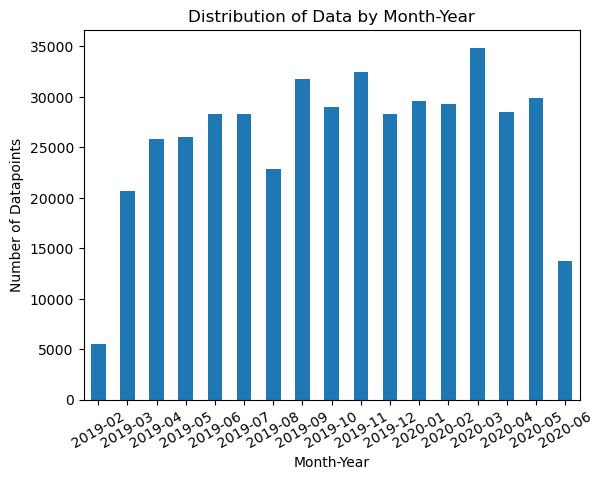

In [6]:
def visualize_month_year(df):
    """
    Plot data binned by year.

    x-axis is the month-year, y-axis is the number of datapoints.

    Parameters
    ----------
    df : Pandas.Dataframe object
    """
    df['month_year'] = df['timestamp'].dt.to_period('M')  # Period with month frequency
    df.groupby('month_year').size().plot(kind="bar")
    
    plt.xlabel('Month-Year')
    plt.xticks(rotation=30)
    plt.ylabel('Number of Datapoints')
    plt.title('Distribution of Data by Month-Year')
    plt.show()
    
    


data['timestamp'] = pd.to_datetime(data['timestamp'])
visualize_month_year(data)

Let's see the distribution of alarm IDs we are working with. We are using bins of size 50 to make the visualization more succinct; this grouping is arbitrary.

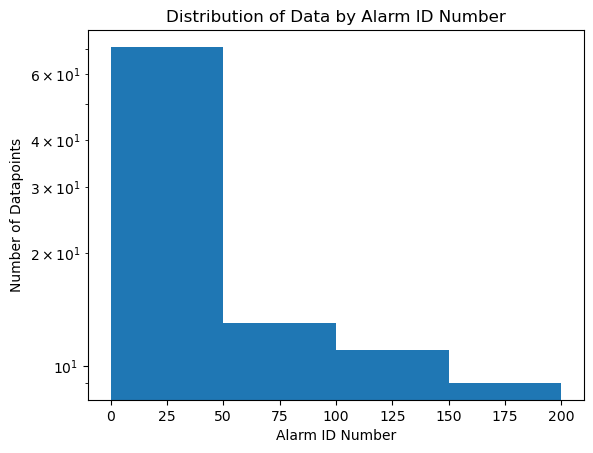

In [7]:
def visualize_alarm(df):
    """
    Plot data binned by year.

    x-axis is the alarm ID, y-axis is the number of datapoints.

    Parameters
    ----------
    df : Pandas.Dataframe object
    """

    alarm_counts = df['alarm'].value_counts()
    non_zero_alarms = alarm_counts[alarm_counts > 0]
    bins = [i for i in range(0, max(non_zero_alarms.index) + 50, 50)]
    non_zero_alarms.plot(kind="hist", log=True, bins=bins)
    plt.xlabel('Alarm ID Number')
    plt.ylabel('Number of Datapoints')
    plt.title('Distribution of Data by Alarm ID Number')
    plt.show()
    
    


visualize_alarm(data)

In [8]:
print("Number of unique serial IDs: " + str(data['serial'].unique().shape[0]))

Number of unique serial IDs: 20


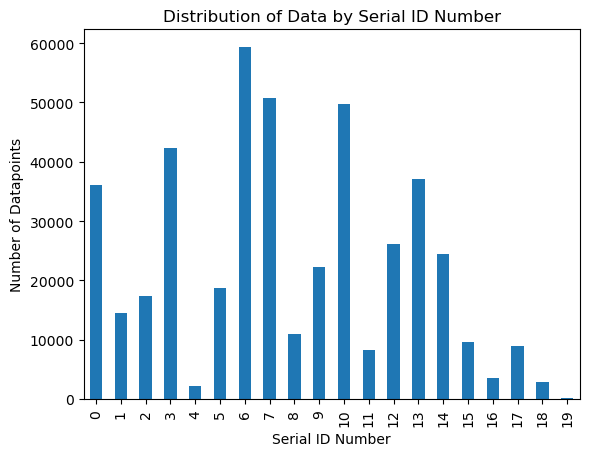

In [9]:
def visualize_serial(df):
    """
    Plot data binned by serial ID.

    x-axis is the serial number, y-axis is the number of datapoints.

    Parameters
    ----------
    df : Pandas.Dataframe object
    """
    
    serial_counts = df['serial'].value_counts()
    non_zero_serials = serial_counts[serial_counts > 0].sort_index()

    
    non_zero_serials.plot(kind="bar")
    plt.xlabel('Serial ID Number')
    plt.ylabel('Number of Datapoints')
    plt.title('Distribution of Data by Serial ID Number')
    plt.show()
    
    


visualize_serial(data)

ModuleNotFoundError: No module named 'tensorflow'